<a href="https://colab.research.google.com/github/Ichchhya/drowsiness_detection_system/blob/master/drowsypractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2,os
data_path='/content/Datasets'
categories=os.listdir(data_path)
labels= [i for i in range(len(categories))]
labels_dict=dict(zip(categories,labels))
print(labels_dict)
print(categories)
print(labels)

In [10]:
img_size=100
data=[]
target=[]

for category in categories:
  folder_path=os.path.join(data_path,category)
  img_names=os.listdir(folder_path)

  for img_name in img_names:
    img_path=os.path.join(folder_path,img_name)
    img=cv2.imread(img_path)

    try:
      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized=cv2.resize(gray,(img_size,img_size))
      data.append(resized)
      target.append(labels_dict[category])
    except Exception as e:
      print("Exception: ",e)

In [12]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)
np.save('data',data)
np.save('target',new_target)

In [13]:
import numpy as np
#loading the dataset that we created in previous code
data=np.load('data.npy')
target=np.load('target.npy')

In [17]:
from keras.models import Sequential
from keras.layers import Dropout,Dense,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#first layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Flatten())
model.add(Dropout(0.5))

#fourth layer
model.add(Dense(50,activation='relu'))

#output layer
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [18]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target= train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

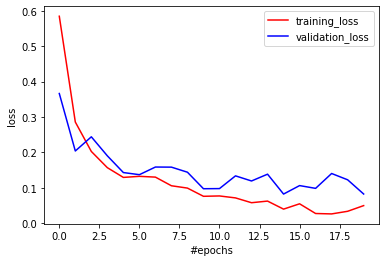

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],'b',label='validation_loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

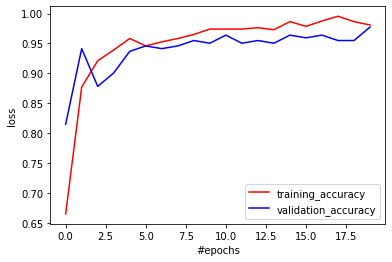

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r',label='training_accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation_accuracy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
print(model.evaluate(test_data,test_target))

4/4 [==============================] - 0s 22ms/step - loss: 0.1056 - accuracy: 0.9597
[0.10555529594421387, 0.9596773982048035]


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

model=load_model('model-015.model')
left_eye_classifier=cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')
right_eye_classifier=cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')
source=cv2.VideoCapture(0)
label_dict={0:'open',1:'closed'}
color_dict={0:(0,255,0),1:(0,0,255)}

# eyes_left = eye_cascade_left.detectMultiScale(left_eye_classifier)
# eyes_right = eye_cascade_right.detectMultiScale(right_eye_classifier)
# for (ex1,ey1,ew1,eh1) in eyes_left:
#     break
# for (ex,ey,ew,eh) in eyes_right:
#     break
